In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
import os
import re

In [98]:
# collecting all the results
n_results = 9
results = []
for i in range(n_results):
    # load previous rewrite and rewrite again
    all_eval = json.load(open("../data/rewrite_" + str(i) + "/all_eval.json", "r"))
    scores = []
    for _eval in all_eval:
        clean = [True if e in [True, "True", "true"] else False for e in _eval]
        scores.append(sum(clean) / len(clean))
    results.append(sum(scores) / len(scores) * 100)
print(results)

[96.4, 79.6, 74.4, 70.60000000000001, 70.00000000000001, 65.59999999999997, 63.39999999999999, 62.6181818181818, 58.29999999999998]


[]

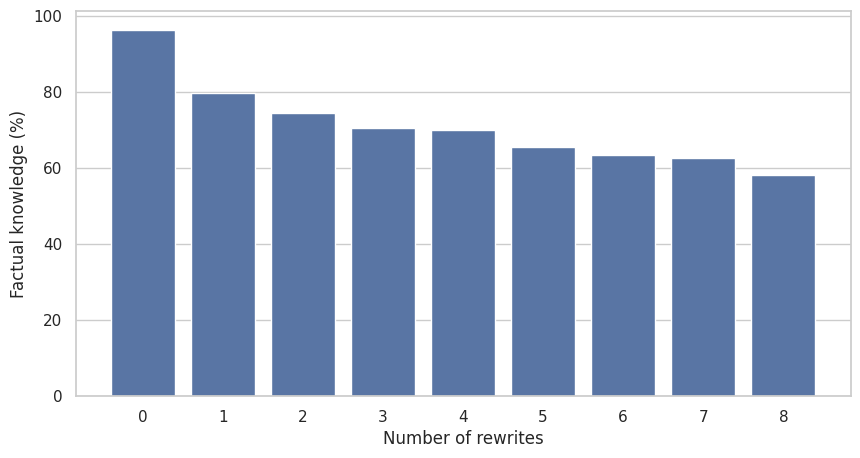

In [99]:
# Plotting a graph of the results with nice seaborn style
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.barplot(results)
ax.set(xlabel='Number of rewrites', ylabel='Factual knowledge (%)')
plt.plot()

[]

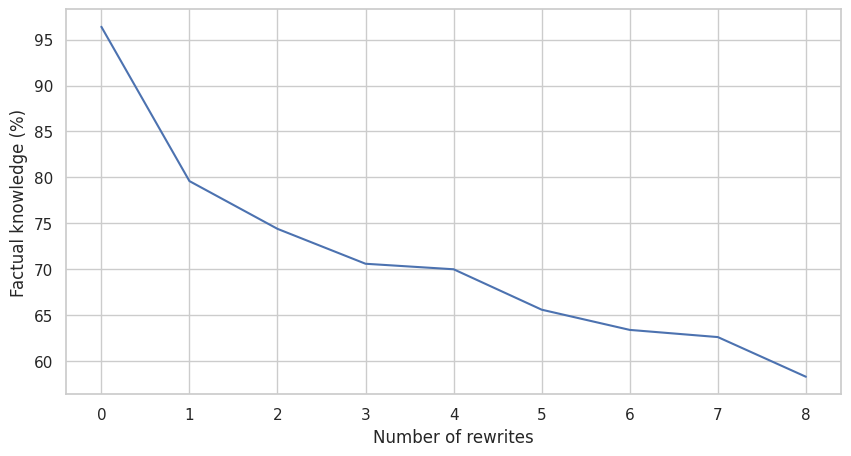

In [100]:
# Same previous plot but as a line plot
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.lineplot(results)
ax.set(xlabel='Number of rewrites', ylabel='Factual knowledge (%)')
plt.plot()

[]

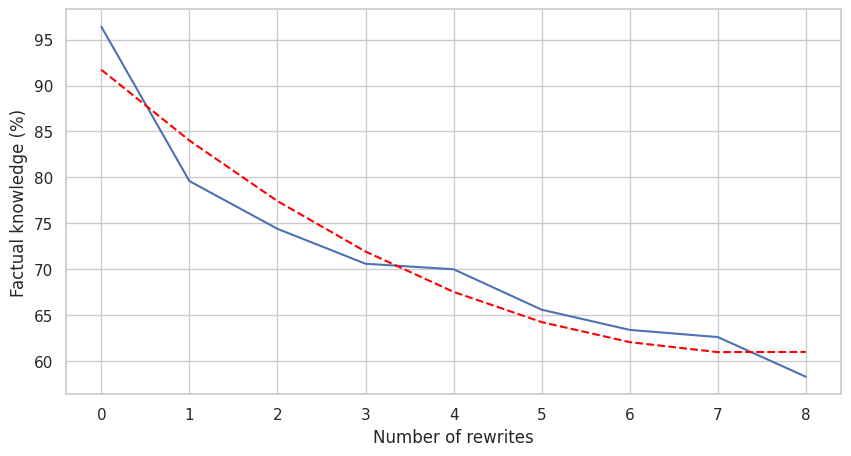

In [101]:
# Fit a polynomial regression model and plot it on top of the previous one
x = np.arange(n_results)
y = np.array(results)
p = np.polyfit(x, y, 2)
f = np.poly1d(p)
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.lineplot(results)
ax.set(xlabel='Number of rewrites', ylabel='Factual knowledge (%)')
plt.plot(f(x), color="red", linestyle="dashed")
plt.plot()